단계 목적 주요 메서드/API 설명
1. 데이터 로딩 학습 데이터 준비 torchvision.datasets, torch.utils.data.DataLoader Dataset과 배치 처리용 DataLoader
2. 전처리 Tensor 변환, 정규화 transforms.ToTensor(), transforms.Normalize() torchvision transforms 모듈
3. 모델 정의 모델 아키텍처 구현 nn.Module 상속 클래스 forward() 메서드 구현 필요
4. 손실/옵티마이저 손실함수 & 업데이트 정의 nn.CrossEntropyLoss(), optim.Adam() 매 epoch마다 손실 계산 & 역전파
5. 학습 루프 forward → loss → backward → update model.train(), loss.backward(), optimizer.step() 명시적 학습 루프
6. 저장 모델 or 가중치 저장 torch.save() state_dict 또는 전체 모델 저장
7. 불러오기 저장된 모델 로드 torch.load() + model.load_state_dict() 재현 가능한 학습 이어받기
8. 평가 성능 확인 model.eval() + with torch.no_grad() 학습 꺼두고 성능 측정
9. 예측 추론 결과 반환 model(input) Tensor → label 변환 필요시 .argmax()

항목 Keras TensorFlow (Low-level) PyTorch
데이터 로딩 NumPy / keras.datasets tf.data.Dataset torch.utils.data.Dataset
모델 정의 Sequential, Functional Model 상속 / subclassing nn.Module 상속 + forward()
학습 .fit() 자동화 GradientTape() 수동 수동 학습 루프 (backward())
손실 함수 문자열 지정 가능 tf.keras.losses torch.nn.CrossEntropyLoss 등
옵티마이저 문자열 or 객체 tf.keras.optimizers torch.optim
저장 .save() saved_model.save() torch.save()
추론 .predict() model(input) model(input)
평가 .evaluate() test_step() 수동 구현 + .eval() + no_grad()

구분 코드 설명
1. 텐서 변환 torch.tensor(data, dtype=...) NumPy 데이터를 PyTorch 텐서로 변환. 학습을 위해 float32나 long 타입을 명시해야 합니다.
2. 신경망 정의 nn.Module 사용자 정의 모델 클래스는 반드시 nn.Module을 상속받아야 합니다.
super(...).__init__() 부모 클래스 초기화로, 네트워크 계층 정의 전에 필수입니다.
3. 계층 정의 nn.Linear(in, out) 입력 차원을 받아 선형 계층을 생성합니다. 예: fc1 = nn.Linear(4, 50)
nn.Sigmoid() 시그모이드 활성화 함수 정의
nn.Softmax(dim=1) 다중 클래스 분류를 위한 소프트맥스 함수 정의. dim=1은 각 샘플별 확률 계산
4. 손실 함수 nn.CrossEntropyLoss() 분류 문제용 손실 함수.
5. 최적화기 optim.Adam(params, lr=...) Adam 최적화기 초기화. model.parameters()로 파라미터 전달
6. 순전파 model(inputs) 모델의 forward() 함수를 호출하여 예측값을 반환
7. 손실 계산 criterion(outputs, labels) 예측값과 정답 사이의 손실을 계산
8. 역전파 loss.backward() 손실을 기준으로 모든 파라미터의 그래디언트를 계산
9. 그래디언트 초기화 optimizer.zero_grad() 학습 시 이전 그래디언트를 누적 방지 위해 초기화
10. 가중치 업데이트 optimizer.step() 계산된 그래디언트를 바탕으로 파라미터 업데이트 수행
11. 평가 모드 torch.no_grad() 추론(평가) 시 그래디언트 계산 비활성화로 메모리 절약
12. 예측 결과 torch.max(outputs, 1) 소프트맥스 결과에서 가장 높은 확률의 클래스 인덱스를 반환
13. 정확도 계산 (pred == label).float().mean() 예측값과 실제값이 같은 비율을 평균으로 계산

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class IrisModel(nn.Module):
  def __init__(self):
    super(IrisModel, self).__init__()
    self.fc1 = nn.Linear(4,50) # 4 input 50 output
    self.fc2 = nn.Linear(50,30)
    self.fc3 = nn.Linear(30,3)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
  def forward(self,x):
    x = self.sigmoid(self.fc1(x))
    x = self.sigmoid(self.fc2(x))
    return self.softmax(self.fc3(x))

class IrisModel(nn.Module):
def __init__(self):
PyTorch에서 신경망 모델을 만들기 위해 상속해야 하는 기본 클래스가 torch.nn.Module
이 클래스는 모델의 레이어 정의, 순전파(forward) 정의, 파라미터 추적, 저장/불러오기
등의 기능을 제공합니다.즉, IrisModel은 nn.Module을 확장한 사용자 정의 모델
super(IrisModel, self).__init__()
부모 클래스인 nn.Module의 초기화 메서드를 호출
이것을 호출해야 PyTorch가 이 클래스가 Module임을 인식하고,
내부에서 레이어와 파라미터를 관리

In [ ]:
iris = datasets.load_iris()
X, y = iris.data,iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

X_train_tensor = torch.tensor(X_train,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,dtype=torch.long)
X_test_tensor= torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset  = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset,batch_size=16,shuffle=True)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
torch.long 64비트 정수형 자료형, 즉 int64를 의미
PyTorch에서 텐서를 만들 때 사용할 수 있는 자료형(dtype) 중 하나
torch.int64와 동일한 의미이며, 클래스 내부적으로는 같은 타입.
PyTorch의 nn.CrossEntropyLoss() 함수는 타겟(label) 텐서가 정수형 클래스 인덱스여야 합니다.
예: 클래스가 3개일 경우 정답 라벨은 [0, 1, 2] 형식이어야 하며,
float형 또는 one-hot 형식이면 오류 발생

In [ ]:
model = IrisModel()
criterion = nn.CrossEntropyLoss() # sparse+categorical_crossentropy에 해당
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
  for inputs, labels in train_loader:
    # 순전파
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch[{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch[1/100], Loss: 1.1279
Epoch[2/100], Loss: 1.0969
Epoch[3/100], Loss: 1.0816
Epoch[4/100], Loss: 1.1080
Epoch[5/100], Loss: 1.0926
Epoch[6/100], Loss: 1.0707
Epoch[7/100], Loss: 1.0736
Epoch[8/100], Loss: 1.0755
Epoch[9/100], Loss: 1.1019
Epoch[10/100], Loss: 1.0815
Epoch[11/100], Loss: 1.0202
Epoch[12/100], Loss: 1.0726
Epoch[13/100], Loss: 1.0924
Epoch[14/100], Loss: 1.0099
Epoch[15/100], Loss: 1.0735
Epoch[16/100], Loss: 1.0389
Epoch[17/100], Loss: 0.9932
Epoch[18/100], Loss: 0.9722
Epoch[19/100], Loss: 0.9417
Epoch[20/100], Loss: 1.0427
Epoch[21/100], Loss: 1.0023
Epoch[22/100], Loss: 0.9372
Epoch[23/100], Loss: 0.9457
Epoch[24/100], Loss: 0.8999
Epoch[25/100], Loss: 0.9638
Epoch[26/100], Loss: 0.9294
Epoch[27/100], Loss: 0.9047
Epoch[28/100], Loss: 0.9693
Epoch[29/100], Loss: 0.9142
Epoch[30/100], Loss: 0.9398
Epoch[31/100], Loss: 0.8890
Epoch[32/100], Loss: 0.8789
Epoch[33/100], Loss: 1.0742
Epoch[34/100], Loss: 0.7042
Epoch[35/100], Loss: 0.8698
Epoch[36/100], Loss: 0.7763
E

nn.CrossEntropyLoss() = Sparse Categorical Cross Entropy
손실 함수 nn.CrossEntropyLoss() 는 정수형 라벨 인덱스 (e.g. 0, 1, 2) 를 입력으로 받습니다.
즉, 라벨을 one-hot encoding 하지 않고도 사용할 수 있습니다.
따라서:Keras의 sparse_categorical_crossentropy와 같은 방식입니다.
PyTorch에서는 label이 정수형이면 CrossEntropyLoss가 적절합니다.

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
이 객체를 통해 (input, label) 쌍이 구성됩니다.
for inputs, labels in train_loader:
...
여기서 inputs는 배치된 입력 데이터 (X), labels은 배치된 정답 레이블 (y)입니다.
optimizer.zero_grad()
loss.backward()
optimizer.step()
optimizer.zero_grad()는 필수적인 그래디언트 초기화 작업
이전 미니배치에서 계산된 gradient가 여전히 남아 있음
loss.backward()가 호출되면 그 위에 새로운 gradient가 누적됨따라서,
매 학습 반복마다 수동으로 gradient를 초기화해주어야 함

In [ ]:
with torch.no_grad():
  outputs = model(X_test_tensor)
  _,predicted = torch.max(outputs,1)
  accuracy = (predicted == y_test_tensor).float().mean()
  print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')

Test Accuracy: 97.78%


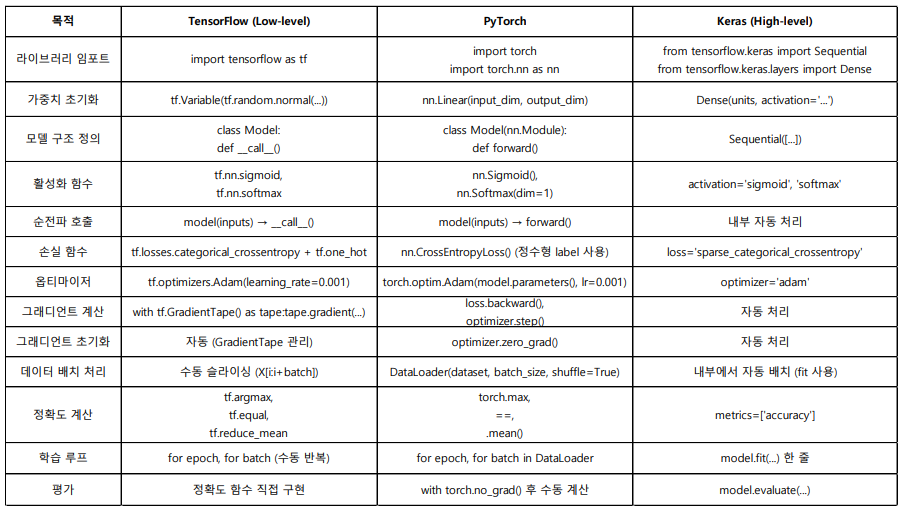